In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline 

data = pd.read_csv('two_moons.csv')

data = data.drop("Unnamed: 0", axis=1)
print(data.shape)
data.tail()

(1000, 3)


,x_1,x_2,y
995,1.566579,-0.024554,1.0
996,0.292032,1.369826,0.0
997,0.351323,-0.533613,1.0
998,0.156315,0.080978,1.0
999,0.514015,-0.503676,1.0


In [2]:
#data.sort_values(by='y', ascending=True)
data_class_1 = data.loc[data['y'] == 1] # Dataframe dos padrões da classe 1
data_class_0 = data.loc[data['y'] == 0] # Dataframe dos padrões da classe 0
print(data_class_0.head())
data_class_1.head()

         x_1       x_2    y
2  -0.245490  1.068868  0.0
6   0.898613  0.822658  0.0
7   0.052219  1.363686  0.0
8  -0.628466  1.141305  0.0
10 -1.157106  0.504670  0.0


,x_1,x_2,y
0,2.064430,0.546069,1.0
1,1.762473,-0.062689,1.0
3,-0.174630,0.183882,1.0
4,0.452110,-0.406512,1.0
5,1.939612,0.430906,1.0


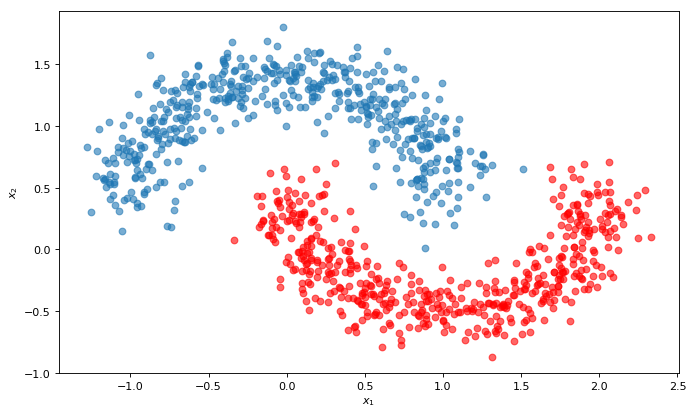

In [3]:
plt.figure(num=None, figsize=(10, 6), dpi=80, facecolor='w', edgecolor='k')
plt.plot(data_class_0['x_1'], data_class_0['x_2'], 'o', alpha=.6)
plt.plot(data_class_1['x_1'], data_class_1['x_2'], 'ro', alpha=.6)
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.show()

In [4]:
teste = np.asarray(data.drop('y', axis=1))
teste_y = np.asarray(data['y'])
print(teste.shape)
print(teste_y.shape)

(1000, 2)
(1000,)


In [5]:
from collections import Counter
count = Counter(teste_y)
count

Counter({1.0: 500, 0.0: 500})

In [6]:
# Compute the number of points of class C1 as N1 and class C2 as N2
N1 = count[0]
N2 = count[1]
print("# of points from class C1:",N1)
print("# of points from class C2:",N2)

# of points from class C1: 500
# of points from class C2: 500


In [7]:
C1 = []
C1_labels = []

C2 = []
C2_labels = []

# separate inputs from class C1 and C2 in different numpy arrays
for i in range(len(teste_y)):
    y = teste_y[i]
    x = teste[i]
    if y == 0:
        C1.append(x)
        C1_labels.append(y)
    elif y == 1:
        C2.append(x)
        C2_labels.append(y)
    
C1 = np.asarray(C1)
C1_labels = np.asarray(C1_labels)
C2 = np.asarray(C2)
C2_labels = np.asarray(C2_labels)

print(C1.shape, C1_labels.shape)

(500, 2) (500,)


In [8]:
# compute the mean vector for each of the 2 classes
# compute the mean accros the Bash size dimension
m1 = np.mean(C1,axis=0)
m2 = np.mean(C2,axis=0)
print(m1, m2)

[-0.00174703  1.03675024] [ 1.00541181 -0.14052539]


In [9]:
# total within-class covariance matrix, given by (4.27)
print("Input vector shape:",C1.shape)
print("m1.shape",m1.shape)

tmp = np.subtract(C1, m1)
a = np.dot(tmp.T, tmp)

tmp = np.subtract(C2, m2)
b = np.dot(tmp.T, tmp)
SW = np.add(a,b)

print("Output:",SW)

Input vector shape: (500, 2)
m1.shape (2,)
Output: [[ 5.21783589e+02 -2.68249071e-02]
 [-2.68249071e-02  1.19062707e+02]]


In [10]:
from numpy.linalg import pinv
inv_SW = pinv(SW)
s = m2 - m1
W = np.dot(inv_SW, np.expand_dims(s,1)) # 
print(W)

[[ 0.00192971]
 [-0.00988743]]


In [11]:
print("Input shape:",teste.shape)
y_hat = np.dot(teste,W)
print(y_hat.shape)
y_hat

Input shape: (1000, 2)
(1000, 1)


array([[-1.41545759e-03],
       [ 4.02090599e-03],
       [-1.10420801e-02],
       [-2.15510375e-03],
       [ 4.89180281e-03],
       [-5.17653826e-04],
       [-6.39990007e-03],
       [-1.33825764e-02],
       [-1.24973298e-02],
       [ 7.33689484e-03],
       [-7.22277126e-03],
       [-2.41164241e-03],
       [ 8.63113954e-03],
       [-1.11862382e-02],
       [ 3.89442930e-04],
       [-5.81268975e-03],
       [ 2.38560511e-03],
       [-9.61862036e-03],
       [-4.85058299e-03],
       [-7.63618790e-03],
       [-5.94917865e-03],
       [-7.48127983e-03],
       [-1.18262528e-02],
       [-1.41792774e-02],
       [ 5.68924312e-03],
       [ 6.13207117e-03],
       [-2.74334105e-03],
       [-8.53191654e-03],
       [ 5.64566323e-03],
       [-3.49710509e-03],
       [ 6.81464961e-03],
       [ 4.92705664e-03],
       [ 1.74641817e-03],
       [ 9.21893675e-03],
       [-1.07379237e-02],
       [ 6.87236844e-03],
       [ 6.61765559e-05],
       [-1.19296501e-02],
       [ 1.9

In [12]:
tot = 0
for m in [m1,m2]:
    tot += np.dot(np.squeeze(W), m)
    print(tot)
    

w0 = 0.5 * tot
#w0 = 0.2
print("Optimal threshold:",w0)

-0.01025416393662476
-0.006924571153295344
Optimal threshold: -0.003462285576647672


In [13]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

clf = LinearDiscriminantAnalysis()
clf.fit(teste, teste_y)
print("Accuracy:",clf.score(teste,teste_y))

Accuracy: 0.951


In [14]:
data.tail()

,x_1,x_2,y
995,1.566579,-0.024554,1.0
996,0.292032,1.369826,0.0
997,0.351323,-0.533613,1.0
998,0.156315,0.080978,1.0
999,0.514015,-0.503676,1.0


In [15]:
W =np.subtract(m2,m1)
print("Weights:",W)

Weights: [ 1.00715884 -1.17727563]


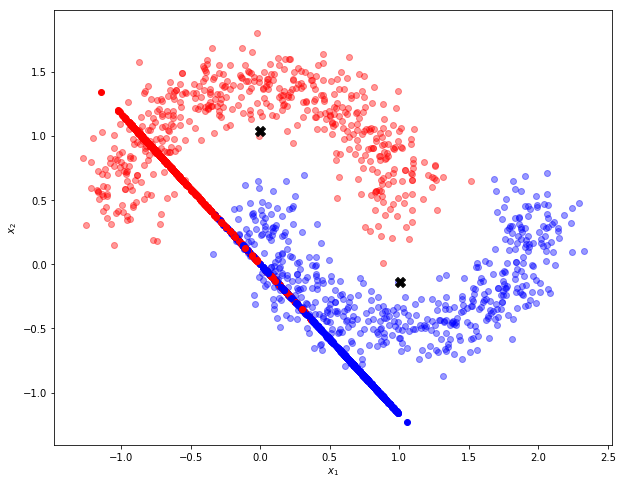

In [16]:
fig, ax = plt.subplots(figsize=(10,8))
colors=['red','blue']
for point, pred in zip(teste,teste_y):
    plt.scatter(point[0],point[1], color=colors[int(pred)], alpha=0.4)
    proj = np.dot(point,W)/np.dot(W,W) * W
    y = np.dot(point,W)
    ax.scatter(proj[0],proj[1],color=colors[int(pred)])

    
ax.scatter(m1[0],m1[1],color='black',s=100,marker="X")
ax.scatter(m2[0],m2[1],color='black',s=100,marker="X")
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")
plt.show()

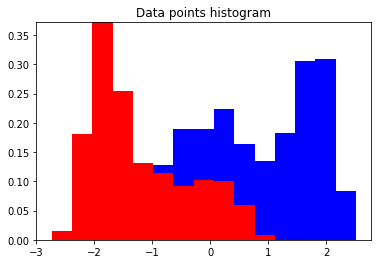

In [17]:
yA = np.squeeze(np.dot(C1,np.expand_dims(W,1)))
yB = np.squeeze(np.dot(C2,np.expand_dims(W,1)))

#np.random.seed(0)

n_bins = 15

fig, axes = plt.subplots(nrows=1, ncols=1)

colors = ['red', 'blue']
axes.hist([yA,yB], n_bins, density=1, color=colors, histtype='bar', stacked=True)
axes.set_title('Data points histogram')

plt.show()

In [36]:
v_recalls = []
fp_tx = []
v_acc = []
f1_score = []
threshold = np.linspace(-.01,0,100)
for w0 in threshold:
    predictions = []
    true_positives = 0
    false_positives = 0
    true_negatives = 0
    false_negatives = 0

    for pred in y_hat:
        if pred < w0:
            predictions.append(0)
        else:
            predictions.append(1)

    for pred, i in zip(predictions,teste_y):
        if pred == 0:
            if pred == i:
                true_negatives +=1
            else:
                false_negatives +=1
        else:
            if pred == i:
                true_positives +=1
            else:
                false_positives +=1

    # Acurácia:
    acc = (true_positives + true_negatives) / len(teste_y)
    
    # Precisão:
    try:
        precision = true_positives / (true_positives + false_positives)
    except ZeroDivisionError:
        precision = 0

    # Taxa de falso positivo:
    FP_tx = false_positives / (true_negatives + false_positives)

    # RECALL: Proporção de amostras da classe positiva corretamente classificadas:
    recall = true_positives / (true_positives + false_negatives)
    
    # F1-Score:
    try:
        f1 = (2*recall*precision)/(recall + precision)
    except ZeroDivisionError:
        f1 = 0
    
    #print("#"*10)
    #print("Threshold:", w0)
    #print("Accurácia:", acc)
    #print("Precisão:", precision)
    #print("Recall:", recall)
    #print("F1-medida:", f1)
    v_recalls.append(recall)
    fp_tx.append(FP_tx)
    v_acc.append(acc)
    f1_score.append(f1)
    


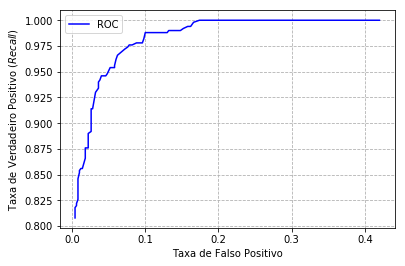

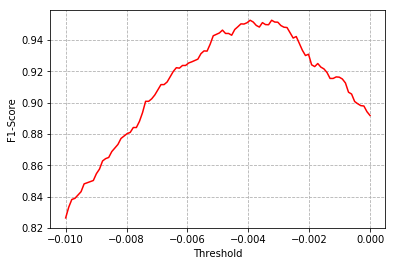

In [44]:
#fig, ax = plt.subplots(figsize=(10,6))
plt.figure(1)
#plt.subplot(211)
plt.plot(fp_tx, v_recalls, 'b-')
plt.grid(True, linestyle='--', linewidth=0.8)
plt.xlabel('Taxa de Falso Positivo')
plt.gca().legend(('ROC',))
plt.ylabel('Taxa de Verdadeiro Positivo ($Recall$)')
#threshold = np.linspace(-100,50,100)
plt.figure(2)
#plt.subplot(212)
plt.plot(threshold,f1_score, 'r-')
plt.grid(True, linestyle='--', linewidth=0.8)
plt.xlabel('Threshold')
plt.ylabel('F1-Score')
plt.show()    

In [20]:
import scipy.optimize as opt

data2 = data.copy()
X = data2.iloc[:,:-1]
y = data2.iloc[:,2]

def mapFeature(X1, X2):
    degree = 3
    out = np.ones(X.shape[0])[:,np.newaxis]
    for i in range(1, degree+1):
        for j in range(i+1):
            out = np.hstack((out, np.multiply(np.power(X1, i-j),np.power(X2, j))[:,np.newaxis]))
    return out
X = mapFeature(X.iloc[:,0], X.iloc[:,1])

def sigmoid(x):
    return 1/(1+np.exp(-x))

def lrCostFunction(theta_t, X_t, y_t, lambda_t):
    m = len(y_t)
    J = (-1/m) * (y_t.T @ np.log(sigmoid(X_t @ theta_t)) + (1 - y_t.T) @ np.log(1 - sigmoid(X_t @ theta_t)))
    #reg = (lambda_t/(2*m)) * (theta_t[1:].T @ theta_t[1:])
    #J = J + reg
    return J

def lrGradientDescent(theta, X, y, lambda_t):
    m = len(y)
    grad = np.zeros([m,1])
    grad = (1/m) * X.T @ (sigmoid(X @ theta) - y)
    grad[1:] = grad[1:] + (lambda_t / m) * theta[1:]
    return grad

(m, n) = X.shape
y = y[:, np.newaxis]
theta = np.zeros((n,1))
lmbda = 1
J = lrCostFunction(theta, X, y, lmbda)
print(J)

output = opt.fmin_tnc(func = lrCostFunction, x0 = theta.flatten(), fprime = lrGradientDescent, \
                         args = (X, y.flatten(), lmbda))
w = output[0]
print(w) # theta contains the optimized values

[[0.69314718]]
[ 3.50145401 -1.1627062  -3.19345584 -4.06904461 -1.19702275 -1.21483039
  3.51450271 -1.76989705  0.3762265  -1.654941  ]


In [21]:
pred = [sigmoid(np.dot(X, w)) >= 0.5]
np.mean(pred == y.flatten()) * 100

99.0

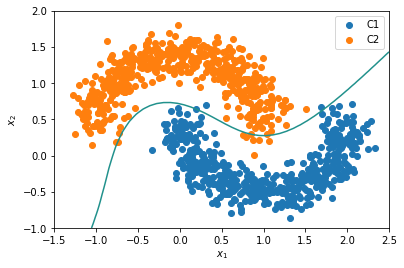

In [22]:
u = np.linspace(-1.5, 2.5, 50)
v = np.linspace(-1, 2, 50)
z = np.zeros((len(u), len(v)))

def mapFeatureForPlotting(X1, X2):
    degree = 3
    out = np.ones(1)
    for i in range(1, degree+1):
        for j in range(i+1):
            out = np.hstack((out, np.multiply(np.power(X1, i-j), np.power(X2, j))))
    return out

for i in range(len(u)):
    for j in range(len(v)):
        #z[j,i] = np.dot(mapFeatureForPlotting(u[i], v[j]), np.squeeze(np.asarray(beta)))
        z[j,i] = np.dot(mapFeatureForPlotting(u[i], v[j]), w)
        
mask = y.flatten() == 1
k = data2.iloc[:,:-1]
c1 = plt.scatter(k[mask]['x_1'], k[mask]['x_2'])
c2 = plt.scatter(k[~mask]['x_1'], k[~mask]['x_2'])
plt.contour(u,v,z,0)
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.legend((c1, c2), ('C1', 'C2'))
plt.show()

In [23]:
def net_input(theta, x):
    # Computes the weighted sum of inputs
    return np.dot(x, theta)

def probability(theta, x):
    # Returns the probability after passing through sigmoid
    return sigmoid(net_input(theta, x))

def predict(x):
    theta = w[:, np.newaxis]
    return probability(theta, x)

def accuracy(x, actual_classes, probab_threshold=0.5):
    predicted_classes = (predict(x) >= probab_threshold).astype(int)
    predicted_classes = predicted_classes.flatten()
    accuracy = np.mean(predicted_classes == actual_classes)
    return accuracy * 100

accuracy(X, y.flatten())

99.0

In [24]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score 

data2 = data.copy()

def mapFeature(X1, X2):
    degree = 3
    out = np.ones(X.shape[0])[:,np.newaxis]
    for i in range(1, degree+1):
        for j in range(i+1):
            out = np.hstack((out, np.multiply(np.power(X1, i-j),np.power(X2, j))[:,np.newaxis]))
    return out
X = mapFeature(data2.iloc[:,0], data2.iloc[:,1])
y = data2.iloc[:,-1]
#print(y)
model = LogisticRegression()
model.fit(X, y.values)
predicted_classes = model.predict(X)
accuracy = accuracy_score(y.values.flatten(),predicted_classes)
parameters = model.coef_

/home/samukz/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [25]:
parameters

array([[ 1.64775071, -1.04512942, -3.03532147, -3.92543235, -1.28882049,
        -1.12003159,  3.44235571, -1.80871208,  0.37253996, -1.69047029]])

In [26]:
accuracy

0.991

In [27]:
v_recalls = []
fp_tx = []
v_acc = []
f1_score = []

for w0 in np.linspace(0,1,10):
    predictions = []
    true_positives = 0
    false_positives = 0
    true_negatives = 0
    false_negatives = 0

    for pred in predict(X):
        if pred < w0:
            predictions.append(0)
        else:
            predictions.append(1)

    for pred, i in zip(predictions,y):
        if pred == 0:
            if pred == i:
                true_negatives +=1
            else:
                false_negatives +=1
        else:
            if pred == i:
                true_positives +=1
            else:
                false_positives +=1

    # Acurácia:
    acc = (true_positives + true_negatives) / len(teste_y)
    
    # Precisão:
    try:
        precision = true_positives / (true_positives + false_positives)
    except ZeroDivisionError:
        precision = 0

    # Taxa de falso positivo:
    FP_tx = false_positives / (true_negatives + false_positives)

    # RECALL: Proporção de amostras da classe positiva corretamente classificadas:
    recall = true_positives / (true_positives + false_negatives)
    
    # F1-Score:
    try:
        f1 = (2*recall*precision)/(recall + precision)
    except ZeroDivisionError:
        f1 = 0
    
    print("#"*10)
    print("Threshold:", w0)
    print("Accurácia:", acc)
    print("Precisão:", precision)
    print("Recall:", recall)
    print("F1-medida:", f1)
    v_recalls.append(recall)
    fp_tx.append(FP_tx)
    v_acc.append(acc)
    f1_score.append(f1)
    


##########
Threshold: 0.0
Accurácia: 0.5
Precisão: 0.5
Recall: 1.0
F1-medida: 0.6666666666666666
##########
Threshold: 0.1111111111111111
Accurácia: 0.96
Precisão: 0.9259259259259259
Recall: 1.0
F1-medida: 0.9615384615384615
##########
Threshold: 0.2222222222222222
Accurácia: 0.977
Precisão: 0.9560229445506692
Recall: 1.0
F1-medida: 0.9775171065493646
##########
Threshold: 0.3333333333333333
Accurácia: 0.983
Precisão: 0.9707602339181286
Recall: 0.996
F1-medida: 0.983218163869694
##########
Threshold: 0.4444444444444444
Accurácia: 0.989
Precisão: 0.9822485207100592
Recall: 0.996
F1-medida: 0.9890764647467726
##########
Threshold: 0.5555555555555556
Accurácia: 0.991
Precisão: 0.9880715705765407
Recall: 0.994
F1-medida: 0.9910269192422732
##########
Threshold: 0.6666666666666666
Accurácia: 0.993
Precisão: 0.997979797979798
Recall: 0.988
F1-medida: 0.9929648241206029
##########
Threshold: 0.7777777777777777
Accurácia: 0.986
Precisão: 0.9979508196721312
Recall: 0.974
F1-medida: 0.9858299595

In [28]:
w0 = np.linspace(-.5,1.5,1000)

ValueError: x and y must have same first dimension, but have shapes (1000,) and (10,)

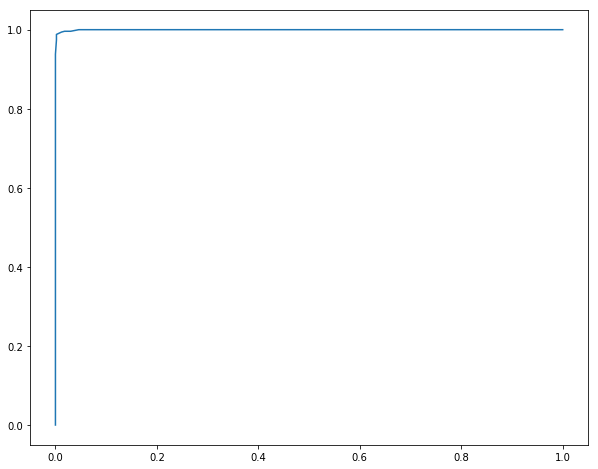

In [29]:
fig, ax = plt.subplots(figsize=(10,8))
plt.plot(fp_tx, v_recalls)
plt.plot(w0, f1_score)
plt.grid(True, linestyle='--', linewidth=0.8)
plt.xlabel('Taxa de Falso Positivo')
plt.gca().legend(('ROC',))
plt.ylabel('Taxa de Verdadeiro Positivo ($Recall$)')
plt.show()